In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re  

#set the graph to show in jupyter notebook
%matplotlib inline

#set seaborn graph to better style
sns.set(style="ticks")

from scipy import stats as stats

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [15]:
claims_data=pd.read_csv("C://Users//PREYANKA//OneDrive//Desktop//Data Science//Python//Case Study//Python Foundation Case Study 3 - Insurance Claims Case Study (1)//insurance claim//claims.csv")
cust_data=pd.read_csv("C://Users//PREYANKA//OneDrive//Desktop//Data Science//Python//Case Study//Python Foundation Case Study 3 - Insurance Claims Case Study (1)//insurance claim//cust_demographics.csv")

In [20]:
final_data=pd.merge(left=claims_data,right=cust_data,left_on='customer_id',right_on='CUST_ID',how='left')

## 2. Perform a data audit for the datatypes and find out if there are any              mismatch within the current datatypes of the columns and their business significance.

In [22]:
final_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [23]:
final_data.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver


## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $sign.



In [24]:
final_data['claim_amount']=final_data['claim_amount'].str.replace('$','')

<ipython-input-24-648e96f48914>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  final_data['claim_amount']=final_data['claim_amount'].str.replace('$','')


In [25]:
final_data['claim_amount']=final_data['claim_amount'].astype('float')

In [26]:
final_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount           float64
total_policy_claims    float64
fraudulent              object
CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [31]:
final_data['alert_flag']=final_data['police_report'].apply(lambda x:1 if x=='Yes' else(0 if x=='No' else x))

In [32]:
final_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,Unknown
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,0
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,0
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,2680.0,1.0,No,19269962.0,Male,13-May-77,NV,956-871-8691,Gold,0


## 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [33]:
final_data.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', 'alert_flag'],
      dtype='object')

In [35]:
final_data['claim_date']=pd.to_datetime(final_data['claim_date'],format='%m/%d/%Y')

In [39]:
sorted_data=final_data[['customer_id','claim_date']].sort_values(by=['claim_date'],ascending=False)

In [42]:
duplicate_values=sorted_data.duplicated(subset='customer_id')

In [43]:
sorted_data[duplicate_values]

,customer_id,claim_date
2,30308357,2018-02-02
4,19269962,2018-01-13
605,53539195,2017-12-24
5,21831191,2017-10-04
630,47830476,2017-04-12
604,85357756,2017-02-23
603,84147585,2017-01-07


In [44]:
final_data.drop_duplicates(subset='customer_id',keep='first',inplace=True,ignore_index=True)

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [50]:
final_data['DateOfBirth']=pd.to_datetime(final_data['DateOfBirth'],format='%d-%b-%y')

In [51]:
categorical=final_data.select_dtypes(include='object')

In [53]:
numerical=final_data.select_dtypes(exclude=object)

In [59]:
categorical.isnull().sum()

incident_cause     0
claim_area         0
police_report      0
claim_type         0
fraudulent         0
gender            15
State             15
Contact           15
Segment           15
alert_flag         0
dtype: int64

In [55]:
numerical.isnull().sum()

claim_id                0
customer_id             0
claim_date              0
claim_amount           65
total_policy_claims    10
CUST_ID                15
DateOfBirth            15
dtype: int64

In [63]:
for i in categorical.columns:
    categorical[i].fillna(categorical[i].mode()[0],inplace=True)

C:\Users\PREYANKA\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [64]:
categorical.isnull().sum()

incident_cause    0
claim_area        0
police_report     0
claim_type        0
fraudulent        0
gender            0
State             0
Contact           0
Segment           0
alert_flag        0
dtype: int64

In [68]:
for i in numerical.columns:
    numerical[i].fillna(numerical[i].mean(),inplace=True)

C:\Users\PREYANKA\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [69]:
numerical.isnull().sum()

claim_id               0
customer_id            0
claim_date             0
claim_amount           0
total_policy_claims    0
CUST_ID                0
DateOfBirth            0
dtype: int64

In [71]:
concat_data=pd.concat([numerical,categorical],axis=1)

## 7. Calculate the age of customers in years. Based on the age, categorize thecustomers       according to the below criteria:



Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [77]:
concat_data['claim_date'].max().year

2018

In [79]:
dt.datetime.now().year

2024

In [81]:
concat_data['Age']=concat_data['claim_date'].max().year-concat_data['DateOfBirth'].dt.year

In [83]:
concat_data['Age_categories']=concat_data['Age'].apply(lambda x:'children'if x<18 else('Youth'if 18<= x <=30 else('Adult'if 30 <x <=60 else 'Senior')))

In [85]:
concat_data.head(2)

,claim_id,customer_id,claim_date,claim_amount,total_policy_claims,CUST_ID,DateOfBirth,incident_cause,claim_area,police_report,claim_type,fraudulent,gender,State,Contact,Segment,alert_flag,Age,Age_categories
0,54004764,21868593,2017-11-27,2980.0,1.0,21868593.0,1979-01-12,Driver error,Auto,No,Material only,No,Female,VT,789-916-8172,Platinum,0,39,Adult
1,33985796,75740424,2018-10-03,2980.0,3.0,75740424.0,1970-01-13,Crime,Home,Unknown,Material only,No,Female,ME,265-543-1264,Silver,Unknown,48,Adult


## 8. What is the average amount claimed by the customers from various segments?

In [86]:
concat_data[['claim_amount','Segment']].groupby(by=['Segment'])[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12675.262946
Platinum,12368.233815
Silver,12267.349306


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [93]:
date_filtered=concat_data[concat_data['claim_date']<=pd.to_datetime('2018-10-01')-pd.Timedelta(days=20)]


In [94]:
date_filtered.groupby(by=['incident_cause'])[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,7.294856e+05
Driver error,3.292987e+06
Natural causes,1.315024e+06
Other causes,3.779919e+06
Other driver error,3.384079e+06


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [102]:
concat_data[['Age_categories','State','incident_cause']][(concat_data['Age_categories']=='Adult') & ((concat_data['State']=='TX') | (concat_data['State']=='DE') | (concat_data['State']=='AK')) & ((concat_data['incident_cause']=='Driver error') | (concat_data['incident_cause']=='Other driver error'))].groupby(['State','incident_cause'])[['Age_categories']].count()

Age_categories
State incident_cause                    
AK    Driver error                     4
      Other driver error               3
DE    Driver error                     2
      Other driver error               3
TX    Driver error                     2
      Other driver error               3

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

In [105]:
pie_chart_data=concat_data[['claim_amount','Segment','gender']].groupby(['Segment','gender'])[['claim_amount']].sum().reset_index()

In [107]:
pie_chart_data

,Segment,gender,claim_amount
0,Gold,Female,2.109532e+06
1,Gold,Male,2.783120e+06
2,Platinum,Female,2.369323e+06
3,Platinum,Male,2.095609e+06
4,Silver,Female,1.898223e+06
5,Silver,Male,2.346279e+06


In [109]:
df=pie_chart_data.pivot(index='Segment',columns='gender',values='claim_amount').stack()

In [110]:
df

Segment   gender
Gold      Female    2.109532e+06
          Male      2.783120e+06
Platinum  Female    2.369323e+06
          Male      2.095609e+06
Silver    Female    1.898223e+06
          Male      2.346279e+06
dtype: float64

Text(0.5, 1.0, 'claim amount of male/female with segment')

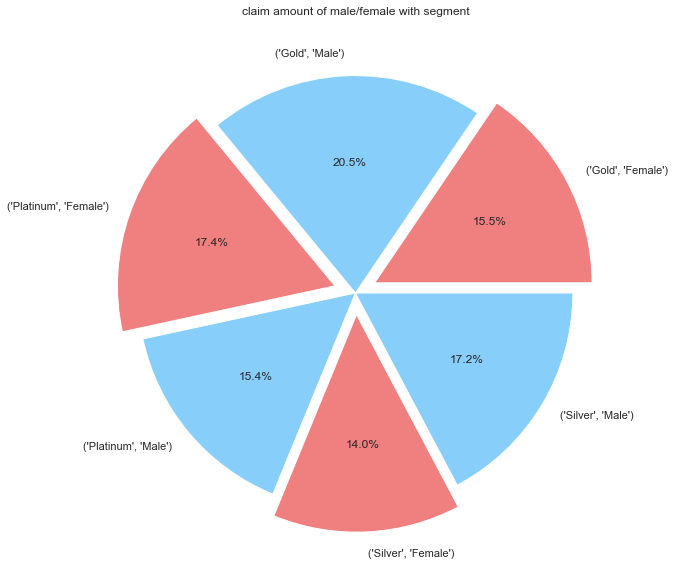

In [133]:
plt.figure(figsize=((10,10)))
plt.pie(df,labels=df.index,autopct='%1.1f%%',colors=['lightcoral','lightskyblue'],explode=(0.1, 0, 0.1, 0, 0.1, 0))
plt.title('claim amount of male/female with segment')

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [153]:
bar_data=concat_data[['gender','incident_cause']][(concat_data['incident_cause']=='Driver error')|(concat_data['incident_cause']=='Other driver error')].groupby(['gender','incident_cause'])['incident_cause'].count().reset_index(name='count')

<AxesSubplot:xlabel='incident_cause', ylabel='count'>

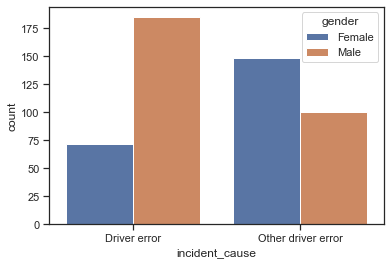

In [155]:
sns.barplot(x='incident_cause',y='count',hue='gender',data=bar_data)

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [164]:
AF=concat_data[['Age_categories','fraudulent']][concat_data['fraudulent']=='Yes'].groupby(by=['Age_categories'])[['fraudulent']].count().reset_index()

In [165]:
AF

,Age_categories,fraudulent
0,Adult,113
1,Youth,74
2,children,67


Text(0.5, 1.0, 'Count of fraudulent among Age group')

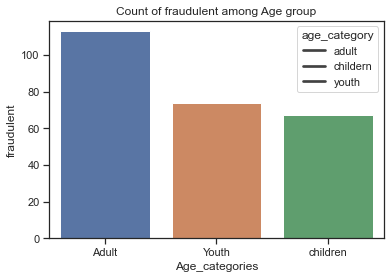

In [169]:
sns.barplot(x='Age_categories',y='fraudulent',data=AF)
plt.legend(title='age_category', labels=['adult', 'childern','youth'])
plt.title("Count of fraudulent among Age group")

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [172]:
data=concat_data[['claim_date','claim_amount']]

In [188]:
data['Month']=data.loc[:,'claim_date'].dt.month_name()

<ipython-input-188-97c3b1754089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']=data.loc[:,'claim_date'].dt.month_name()


In [189]:
list=['January','February','March','April','May','June','July','August','September','October','November','December']

In [191]:
monthly_claim=data.groupby('Month')['claim_amount'].sum()
z=monthly_claim[list].reset_index()
z

,Month,claim_amount
0,January,1.331832e+06
1,February,1.156579e+06
2,March,1.348315e+06
3,April,1.276020e+06
4,May,1.115035e+06
5,June,1.317728e+06
6,July,1.382493e+06
7,August,9.134147e+05
8,September,9.803903e+05
9,October,1.428671e+06


Text(0.5, 1.0, 'Monthly trend of Total amount')

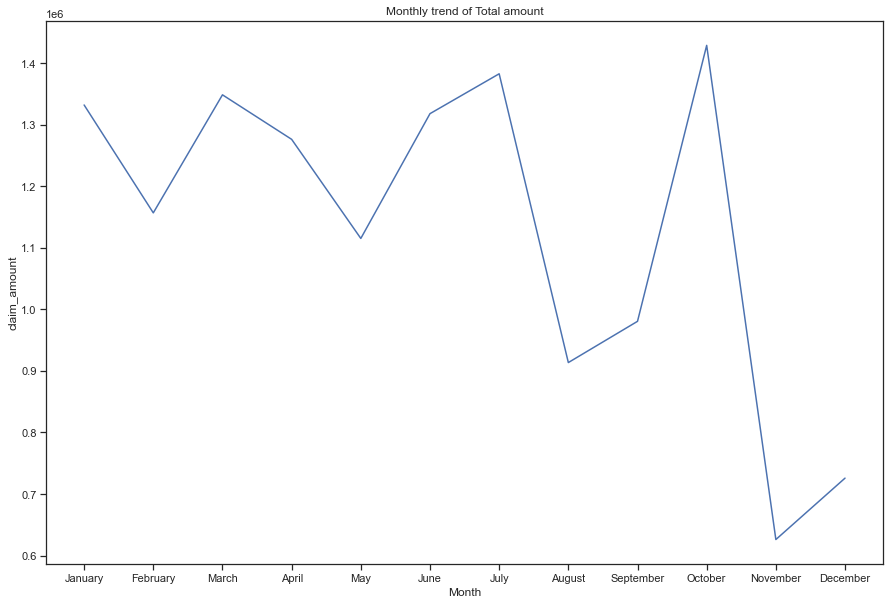

In [196]:
plt.figure(figsize=((15,10)))
sns.lineplot(x='Month',y='claim_amount',data=z)
plt.title("Monthly trend of Total amount")

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [202]:
avg_claim=concat_data[['gender','Age_categories','fraudulent','claim_amount']].groupby(by=['gender','Age_categories','fraudulent'])[['claim_amount']].mean().reset_index()

<Figure size 1440x1440 with 0 Axes>

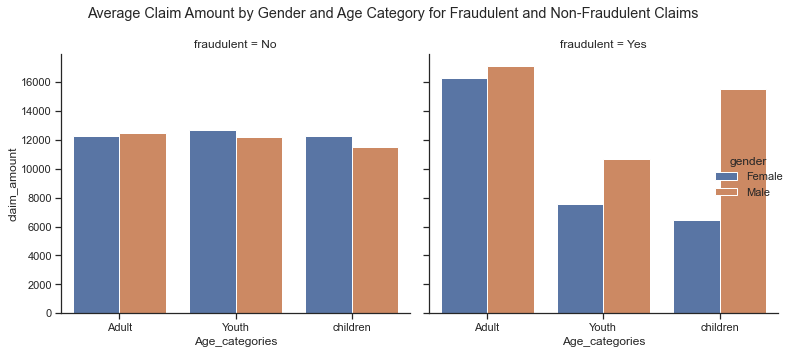

In [216]:
plt.figure(figsize=((20,20)))
sns.catplot(x='Age_categories',y='claim_amount',hue='gender',col='fraudulent',kind='bar',data=avg_claim)
plt.suptitle("Average Claim Amount by Gender and Age Category for Fraudulent and Non-Fraudulent Claims")

plt.tight_layout()

# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

## 16. Is there any similarity in the amount claimed by males and females?

In [220]:
#Perform t-test(two sample independent)
#CI=95%  SI=0.05


#Ho: there is similarities in the amount claimed by male and female.
#Ha: there is no similarities in the amount claimed by male and female.

Males=concat_data.loc[concat_data['gender']=='Male','claim_amount']
Females=concat_data.loc[concat_data['gender']=='Female','claim_amount']

In [223]:
stats.ttest_ind(Males,Females)

Ttest_indResult(statistic=0.821612848932144, pvalue=0.4114767802889234)

In [ ]:
#From the above statistical test we can see that pvalue=0.41 > 0.05 .So Accept Null Hypothesis.

###### Answer : There is similarities in the amount claimed by male and female

## 17. Is there any relationship between age category and segment?

In [228]:
#We will use chi-square here.
#Ho:No relationship b/w Age category and segment.
#Ha:Relationship b/w Age category and segment.

Frequency=pd.crosstab(concat_data['Age_categories'],concat_data['Segment'])
Frequency

Segment,Gold,Platinum,Silver
Age_categories,,,
Adult,180,160,158
Youth,110,118,107
children,96,83,81


In [229]:
stats.chi2_contingency(Frequency)

(1.6076859637534933,
 0.8074100664578122,
 4,
 array([[175.87191217, 164.48124428, 157.64684355],
        [118.3074108 , 110.64501372, 106.04757548],
        [ 91.82067704,  85.87374199,  82.30558097]]))

In [ ]:
#0.80>0.05 so here we will accept null hypothesis

###### Answer : There is no relationship b/w age catogories and segment.

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [235]:
#Here we will use ttest_1samp .it is use when you compare 1sample mean with known population mean
#Ho:No change is current year and previous year claim amount.
#Ha: Change is current year and previous year claim amount.

current_claim=concat_data['claim_amount'][concat_data['claim_date'].dt.year==2017]

In [236]:
stats.ttest_1samp(current_claim,10000)

Ttest_1sampResult(statistic=4.258588422072148, pvalue=2.3853131901637023e-05)

In [ ]:
#0.05 >0.00002385 so here we will reject null hypothesis .

###### Answer : There is change in current year claim amount and previous year claim amount

## 19. Is there any difference between age groups and insurance claims?

In [237]:
concat_data[['Age_categories','claim_amount']]

,Age_categories,claim_amount
0,Adult,2980.0
1,Adult,2980.0
2,Adult,3369.5
3,Adult,1680.0
4,Adult,2680.0
...,...,...
1088,children,3059.0
1089,children,1520.0
1090,children,23575.0
1091,children,25120.0


In [239]:
concat_data['Age_categories'].unique()

array(['Adult', 'Youth', 'children'], dtype=object)

In [243]:
Adult=concat_data['claim_amount'][concat_data['Age_categories']=='Adult']
Youth=concat_data['claim_amount'][concat_data['Age_categories']=='Youth']
children=concat_data['claim_amount'][concat_data['Age_categories']=='children']

In [244]:
#Here we will use annova test as we are going compaire more than 3 groups.

#Ho:there is no difference
#Ha:there is difference

In [245]:
stats.f_oneway(Adult,Youth,children)

F_onewayResult(statistic=2.2037228388804517, pvalue=0.1108830313065247)

In [ ]:
#0.05<0.11 .so here we will Accept Null Hypothesis

###### Answer : There is no difference between age groups and insurance claim

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [248]:
concat_data[['total_policy_claims','claim_amount']].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.016409
claim_amount,-0.016409,1.000000


###### Answer : there is negative relationship between total policy claims and claim amount